# Speed Bumps by Neighborhood
#### By: Jake Kressley
Dataset: [City of Pittsburgh Speed Humps](https://data.wprdc.org/dataset/city-of-pittsburgh-speed-humps/resource/37b2ac41-ae8e-4de1-8405-157e05dc3640)

## Setting Up the Notebook

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

To start let's load in the speed bumps data.

In [67]:
speed_humps_df = pd.read_csv("data/speed-humps.csv")
speed_humps_df.head(5)

,id,hump_id,locator_address_number,locator_street,pavement,speed_hump_material,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,430808404,1,4337.0,Saline St,9257,Asphalt,Squirrel Hill South,5,14,42003141400,3,14,4,2-15,40.419835,-79.926062
1,1520886592,2,NaN,Summerset Dr,15346,NaN,Squirrel Hill South,5,14,42003141400,3,14,4,2-20,40.425040,-79.912040
2,858537521,3,511.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.456746,-79.954521
3,297775878,4,547.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.457333,-79.954899
4,1061197751,5,593.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.458061,-79.955355


Next let's filter out the unnessessary columns to make the data look a little more readable. 

In [68]:
# Create a new dataframe
speedhumps = pd.DataFrame(columns = ["Neighborhood", "Hump_ID"])

# Add the desired data to the dataframe
speedhumps["Neighborhood"] = speed_humps_df["neighborhood"]
speedhumps["Hump_ID"] = speed_humps_df["hump_id"]

speedhumps.head(5)

,Neighborhood,Hump_ID
0,Squirrel Hill South,1
1,Squirrel Hill South,2
2,North Oakland,3
3,North Oakland,4
4,North Oakland,5


Since this csv tracks by individual speed hump and not how many there are in a neighborhood, we will have to create a hash map to track how many speed bumps are in each neighborhood.

In [69]:
# define the dictionary that will store the data
speedhump_dict = {}

for i, row in speedhumps.iterrows():
    neighborhood = row["Neighborhood"]
    
    if neighborhood not in speedhump_dict.keys():
        speedhump_dict.update({neighborhood: [neighborhood, 1]})
    else:
        current_count = speedhump_dict[neighborhood]
        current_count[1] += 1
        speedhump_dict.update({neighborhood: current_count})

speedhumps_df = pd.DataFrame.from_dict(speedhump_dict, orient = "index")
speedhumps_df.columns = ["Neighborhood", "Speed Humps"]
speedhumps_df

,Neighborhood,Speed Humps
Squirrel Hill South,Squirrel Hill South,18
North Oakland,North Oakland,6
Brookline,Brookline,4
Bloomfield,Bloomfield,3
Polish Hill,Polish Hill,6
Homewood South,Homewood South,4
Mount Washington,Mount Washington,3
South Side Flats,South Side Flats,3
Central Oakland,Central Oakland,1
Squirrel Hill North,Squirrel Hill North,3


(If a neighborhood does not have any values it is safe to assume that there are no speedbumps in that neighborhood.)

Now we can sort the data in descending order to find which neighborhoods have the highest amount of speed humps.

In [70]:
speedhumps_df = speedhumps_df.sort_values("Speed Humps", ascending=False)
speedhumps_df

,Neighborhood,Speed Humps
Squirrel Hill South,Squirrel Hill South,18
Carrick,Carrick,9
Polish Hill,Polish Hill,6
North Oakland,North Oakland,6
Upper Hill,Upper Hill,4
Brookline,Brookline,4
Homewood South,Homewood South,4
South Side Slopes,South Side Slopes,4
Perry North,Perry North,4
Garfield,Garfield,3


We can now create a graph that represents how many speed humps are in each neighborhood

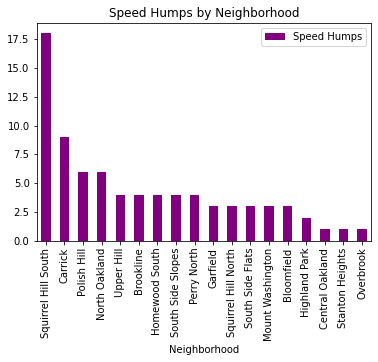

In [83]:
y_axis_labels = range(1, 18)

speedhumps_plt = speedhumps_df.plot(kind='bar', 
                                    x='Neighborhood', 
                                    y="Speed Humps", 
                                    title="Speed Humps by Neighborhood", 
                                    color='purple', 
                                    )

From this data you can see that Squirrel Hill South has the most speed bumps

# Number of Crashes by Neighborhood
### By: Jake Kressley

Datasets: 

[Allegheny County Crash Data (2021)](https://data.wprdc.org/dataset/allegheny-county-crash-data)

[Pittsburgh Neighborhoods](https://data.wprdc.org/dataset/neighborhoods2)

(load in the data and then say as you can see there is no neighborhood column)

Let's start the same way as last time by importing and setting up the notebook

In [56]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

Now we can load in our crash data

In [57]:
crash_data = pd.read_csv('data/crash-data.csv')

crash_data.head(3)

<ipython-input-57-b7a355eccce3>:1: DtypeWarning: Columns (77,80) have mixed types. Specify dtype option on import or set low_memory=False.
  crash_data = pd.read_csv('data/crash-data.csv')


,CRASH_CRN,DISTRICT,CRASH_COUNTY,MUNICIPALITY,POLICE_AGCY,CRASH_YEAR,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,HOUR_OF_DAY,...,LANE_COUNT,RDWY_ORIENT,ROAD_OWNER,ROUTE,SPEED_LIMIT,SEGMENT,OFFSET,STREET_NAME,TOT_INJ_COUNT,SCHOOL_BUS_UNIT
0,2021000002,11,2,2113,02113,2021,1,6,28.0,0.0,...,2.0,N,2,0130,35.0,142.0,490.0,BEULAH RD,4,NaN
1,2021000007,11,2,2113,02113,2021,1,6,100.0,1.0,...,99.0,U,4,NaN,NaN,NaN,NaN,LAKETON RD,0,NaN
2,2021000017,11,2,2301,02301,2021,1,6,140.0,1.0,...,2.0,N,4,NaN,25.0,NaN,NaN,SARANAC AV,0,NaN


Evidently, this data set does not include the specific neighborhood which an incident occured in. However, it does have the latitude and longitudinal coordinates, so we can manually find the neighborhood each crash occured in.

Still, we can make this table a little more readable.

In [25]:
crashes = pd.DataFrame(columns = ["Crash ID", "Latitude", "Longitude"])
crashes["Crash ID"] = crash_data["CRASH_CRN"]
crashes["Latitude"] = crash_data["DEC_LAT"]
crashes["Longitude"] = crash_data["DEC_LONG"]

crashes.head(3)

,Crash ID,Latitude,Longitude
0,2004000001,40.3234,-79.9404
1,2004000010,40.3182,-79.9076
2,2004000016,40.4886,-80.3371


Almost there we just need to remove NaN values

In [51]:
# removes a row if either latitude or longitude have a null value
filtered_crashes = crashes[crashes[['Latitude', 'Longitude']].notnull().all(1)]

# Decided to do only the 
filtered_crashes = filtered_crashes.iloc[:10000]

filtered_crashes

,Crash ID,Latitude,Longitude
0,2004000001,40.323400,-79.940400
1,2004000010,40.318200,-79.907600
2,2004000016,40.488600,-80.337100
6,2004000047,40.418800,-80.049400
11,2004000071,40.461200,-80.008700
...,...,...,...
13086,2005044631,40.525299,-79.948402
13087,2005044633,40.544102,-79.954201
13088,2005044634,40.294102,-79.822601
13089,2005044638,40.617100,-80.089401


Now we need to figure out which neighborhood each crash occured in. To do this we will first have to load in our neighborhood data.

In [58]:
neighborhood_data = gpd.read_file('data/pittsburghpaneighborhoods-/Neighborhoods_.shp')

neighborhood_data.head(3)

,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,created_us,created_da,last_edite,last_edi_1,temp,pghdb_sde_,GlobalID,Shape__Are,Shape__Len,geometry
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,7968760.0,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,8.153647e+06,14047.065024,"POLYGON ((-79.90560 40.45522, -79.90553 40.455..."
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,34078712.0,20d4605b-258e-441a-a57e-a28fdabb6d30,3.407739e+07,30347.886823,"POLYGON ((-79.91309 40.43804, -79.91321 40.438..."
2,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,12751163.0,bf4065e7-c29c-48bd-b529-e7fd99077238,1.275116e+07,14577.441571,"POLYGON ((-79.93457 40.47217, -79.93455 40.472..."


We will have to use the Geometry column to determine which crashes occur in which neighborhood. So let's make a new dataframe with only the desired columns

In [59]:
filtered_neighborhoods = pd.DataFrame(columns = ["Neighborhood", "Geometry", "Crashes"])
filtered_neighborhoods["Neighborhood"] = neighborhood_data["hood"]
filtered_neighborhoods["Geometry"] = neighborhood_data["geometry"]

# Set the crash count to 0 so we can count them later.
filtered_neighborhoods["Crashes"] = 0

filtered_neighborhoods.head(3)

,Neighborhood,Geometry,Crashes
0,Point Breeze North,"POLYGON ((-79.90560 40.45522, -79.90553 40.455...",0
1,Squirrel Hill North,"POLYGON ((-79.91309 40.43804, -79.91321 40.438...",0
2,Garfield,"POLYGON ((-79.93457 40.47217, -79.93455 40.472...",0


Now check each crash and calculate which neighborhood they occured in. We will do this by using the Point class. The point class has a contains() function that allows you to check if a certain point is contained in a group of points. 

In [61]:
from shapely.geometry import Point
crash_dict = {}

for i, crash in filtered_crashes.iterrows():
    # First, fix the point by using the correct latitude and longitude
    pt = Point(crash["Longitude"], crash["Latitude"])
    for j, neighborhood in filtered_neighborhoods.iterrows():
        # Check if the neighborhood has the stop
        if neighborhood["Geometry"].contains(pt):
            filtered_neighborhoods.at[j, 'Crashes'] = neighborhood["Crashes"] + 1
            # Break to save computation time
            break

filtered_neighborhoods

,Neighborhood,Geometry,Crashes
0,Point Breeze North,"POLYGON ((-79.90560 40.45522, -79.90553 40.455...",86
1,Squirrel Hill North,"POLYGON ((-79.91309 40.43804, -79.91321 40.438...",98
2,Garfield,"POLYGON ((-79.93457 40.47217, -79.93455 40.472...",46
3,Bedford Dwellings,"POLYGON ((-79.96601 40.45520, -79.96596 40.454...",22
4,Knoxville,"POLYGON ((-79.98845 40.41851, -79.98821 40.418...",52
...,...,...,...
85,Regent Square,"POLYGON ((-79.89709 40.42765, -79.89661 40.427...",10
86,Terrace Village,"POLYGON ((-79.95848 40.44846, -79.95849 40.448...",26
87,Elliott,"POLYGON ((-80.02795 40.44463, -80.02806 40.444...",22
88,South Side Flats,"POLYGON ((-79.97726 40.43272, -79.97725 40.432...",130


Now we can sort the neighborhoods by which ones have the most crashes.

In [64]:
neighborhoods_sorted = filtered_neighborhoods.sort_values("Crashes", ascending=False)

neighborhoods_sorted

,Neighborhood,Geometry,Crashes
80,Squirrel Hill South,"POLYGON ((-79.94475 40.44101, -79.94405 40.440...",360
43,Central Business District,"POLYGON ((-79.99238 40.44484, -79.99233 40.444...",330
52,Bloomfield,"POLYGON ((-79.94645 40.46547, -79.94621 40.465...",202
24,Brookline,"POLYGON ((-80.00172 40.40193, -80.00171 40.401...",192
62,South Oakland,"POLYGON ((-79.95899 40.43665, -79.95887 40.436...",188
...,...,...,...
50,Chartiers City,"POLYGON ((-80.06919 40.46046, -80.06912 40.460...",6
28,East Carnegie,"POLYGON ((-80.07255 40.42533, -80.07245 40.424...",4
67,Mt. Oliver,"POLYGON ((-79.97842 40.40626, -79.97848 40.406...",2
18,Arlington Heights,"POLYGON ((-79.96568 40.41735, -79.96566 40.417...",0


We can see that Squirrel Hill South has the most crashes and Arlington Heights and Glen Hazel are tied for the least.

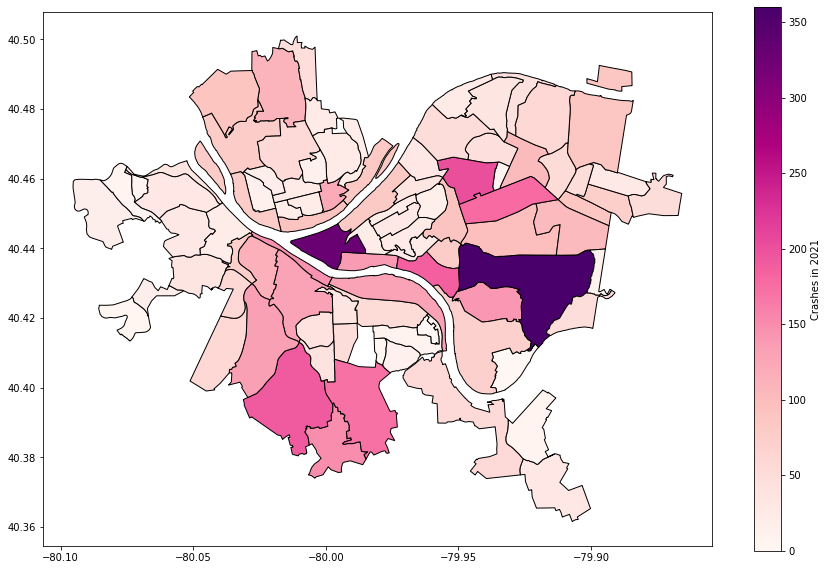

In [93]:
neighborhood_data["Crashes"] = filtered_neighborhoods["Crashes"]
neighborhood_data.plot(column="Crashes", 
                       legend=True,
                       edgecolor="black", 
                       cmap='RdPu',
                       legend_kwds={'label': 'Crashes in 2021'}, 
                       figsize=(15,10))

In the graph above, the lighter the color, the more crashes.